In [1]:
from phomo import Mosaic, Master, Pool

/home/lcoyle/.cache/pypoetry/virtualenvs/phomo-pX3Qwu7w-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Create the tile pool

In [2]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))

Loading tiles: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 9780/9780 [00:04<00:00, 2216.59it/s]


Get a random image for the master image.

In [3]:
from random import sample
from pathlib import Path

master_file = sample(list(Path("faces").glob('*')), 1)[0]

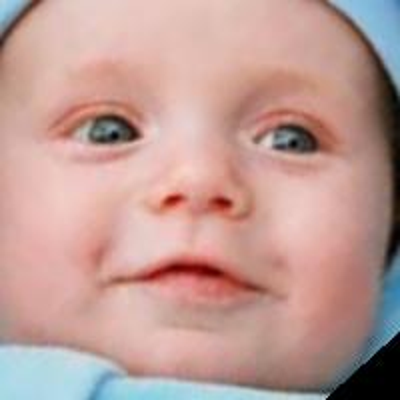

In [4]:
master = Master.from_file(master_file, img_size=(400, 400))
master.img

In [5]:
mosaic = Mosaic(master, pool)

## All the different metrics

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:16<00:00, 23.86it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 247014.37it/s]


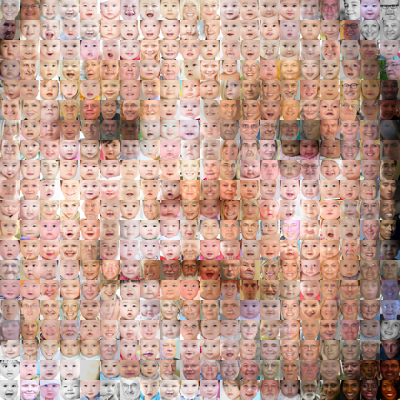

In [6]:
mosaic.build(mosaic.d_matrix(metric="norm"))

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:29<00:00, 13.56it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 257319.26it/s]


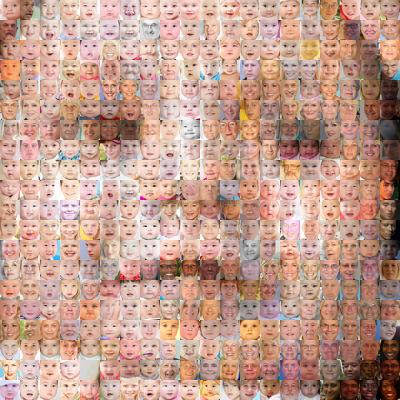

In [7]:
mosaic.build(mosaic.d_matrix(metric="greyscale"))

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:29<00:00, 13.73it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 223726.04it/s]


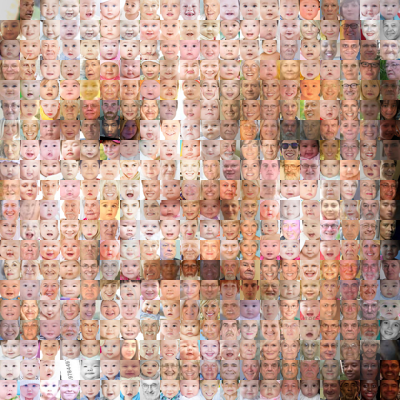

In [8]:
mosaic.build(mosaic.d_matrix(metric="luv_approx"))

## Changing the parameters of `np.linalg.norm`

This results in slightly different mosaics.

See the numpy docs:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:34<00:00, 11.71it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 217405.93it/s]


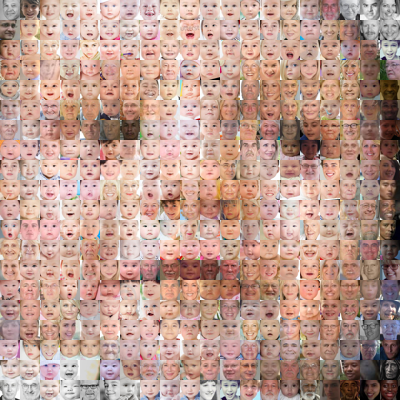

In [9]:
mosaic.build(mosaic.d_matrix(metric="norm", ord=1))

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:59<00:00,  6.70it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 227982.28it/s]


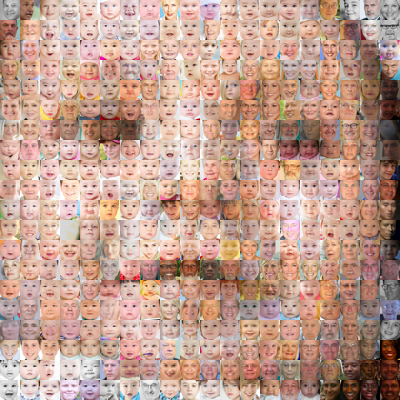

In [10]:
mosaic.build(mosaic.d_matrix(metric="norm", ord=2))

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:16<00:00, 24.14it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 268349.58it/s]


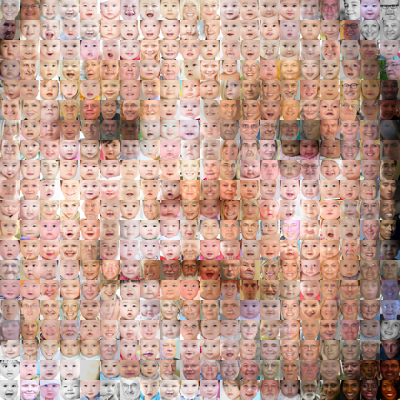

In [11]:
mosaic.build(mosaic.d_matrix(metric="norm", ord="fro"))

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:40<00:00,  9.92it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 239640.28it/s]


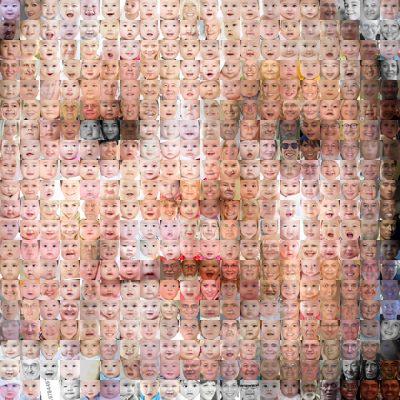

In [12]:
mosaic.build(mosaic.d_matrix(metric="norm", ord="nuc"))

## GPU metrics

When using `Mosaic.d_matrix_cuda` only `"norm"` and `"greyscale"` are supported.

dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 165963.16it/s]


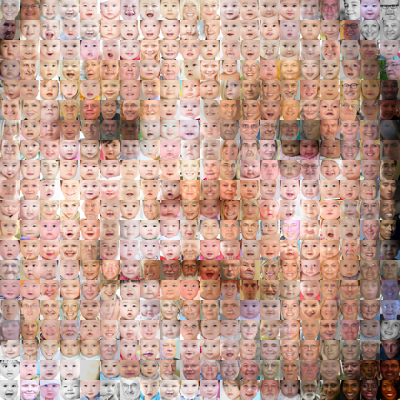

In [13]:
mosaic.build(mosaic.d_matrix_cuda(metric="norm"))

dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 244779.92it/s]


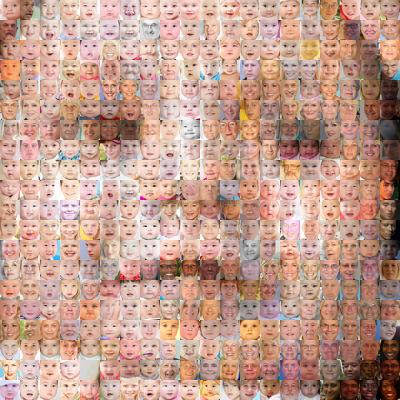

In [15]:
mosaic.build(mosaic.d_matrix_cuda(metric="greyscale"))